<a href="https://colab.research.google.com/github/JRamos84/Hands-On-Machine-Learning/blob/main/chapter_03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST


In [3]:
from sklearn.datasets import fetch_openml

In [4]:
minist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X,y = minist.data,minist.target

In [6]:
X.shape , y.shape

((70000, 784), (70000,))

In [7]:
y[:2]

array(['5', '0'], dtype=object)

In [8]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image,cmap='binary')
  plt.axis('off')

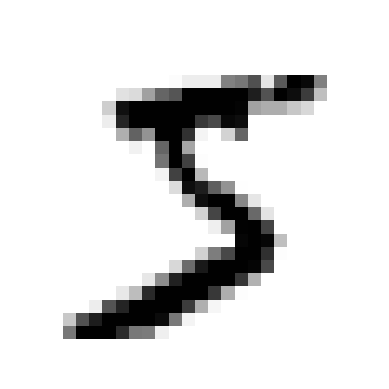

In [9]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Entrenamiento de clasificación binaria

In [11]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

### Medición de rendimiento

### Midiendo aacuracy usando cross-validation

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(sgd_clf, X_train,y_train_5,cv = 3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.dummy import DummyClassifier

In [18]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [19]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### Matriz de confusión

In [20]:
from sklearn.model_selection import cross_val_predict


In [22]:
y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

### Precision and recall

In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [27]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [ ]:
Esta metricas es un resumen de las otras dos y no permite comparar dos clasificadores , el más alto es el mejor clasificador

#### La Precision/Recall Trade off

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve

In [34]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Text(0.5, 1.0, 'Precision and Recall Scores as a Function of the Threshold Value')

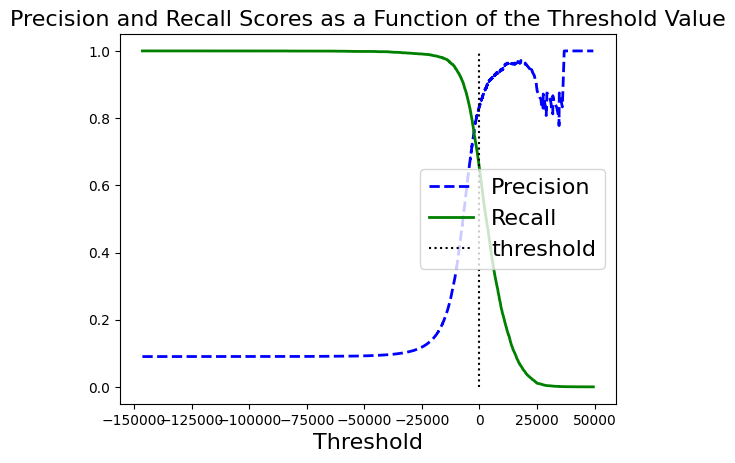

In [35]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.legend(loc="center right", fontsize=16) # Not shown
plt.xlabel("Threshold", fontsize=16)        # Not shown
plt.title("Precision and Recall Scores as a Function of the Threshold Value", fontsize=16)

(0.0, 1.0, 0.0, 1.0)

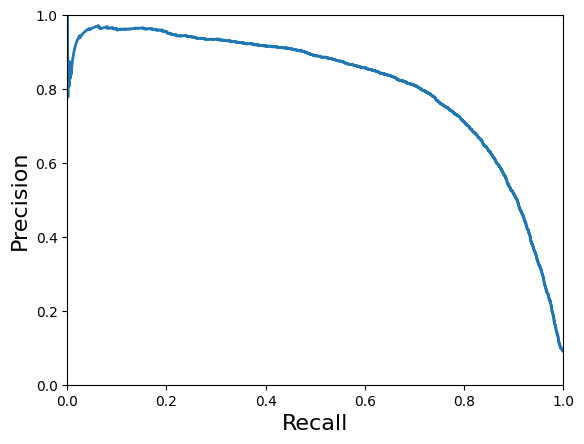

In [36]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])

In [38]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [39]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [40]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [42]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

### La curva ROC